# 서울시 기간별 시간평균 대기환경 정보 데이터 분석 및 시각화

## 데이터 다운로드
> https://data.seoul.go.kr/dataList/datasetView.do?infId=OA-2221&srvType=S&serviceKind=1&currentPageNo=1#AXexec


### 한글 폰트 설정

In [ ]:
# 코랩 사용자는 실행후, 런타임 - 런타임 다시 시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Linux':
    plt.rc('font', family='NanumBarunGothic')

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./서울시 기간별 시간평균 대기환경 정보.csv')

In [3]:
df.head()

,측정일시,권역코드,권역명,측정소코드,측정소명,미세먼지 1시간(㎍/㎥),미세먼지 24시간(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
0,201908161200,100,도심권,111123,종로구,15,12,9,0.022,0.018,0.4,0.004
1,201908161200,100,도심권,111131,용산구,13,11,9,0.029,0.018,0.4,0.003
2,201908161200,100,도심권,111121,중구,16,12,9,0.024,0.018,0.1,0.002
3,201908161200,101,서북권,111201,마포구,0,0,13,0.027,0.012,0.6,0.004
4,201908161200,101,서북권,111181,은평구,20,18,13,0.027,0.017,0.4,0.004


In [4]:
df.columns

Index(['측정일시', '권역코드', '권역명', '측정소코드', '측정소명', '미세먼지 1시간(㎍/㎥)',
       '미세먼지 24시간(㎍/㎥)', '초미세먼지(㎍/㎥)', '오존(ppm)', '이산화질소농도(ppm)',
       '일산화탄소농도(ppm)', '아황산가스농도(ppm)'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36925 entries, 0 to 36924
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   측정일시            36925 non-null  int64  
 1   권역코드            36925 non-null  int64  
 2   권역명             36925 non-null  object 
 3   측정소코드           36925 non-null  int64  
 4   측정소명            36925 non-null  object 
 5   미세먼지 1시간(㎍/㎥)   36925 non-null  int64  
 6   미세먼지 24시간(㎍/㎥)  36925 non-null  int64  
 7   초미세먼지(㎍/㎥)      36925 non-null  int64  
 8   오존(ppm)         36925 non-null  float64
 9   이산화질소농도(ppm)    36925 non-null  float64
 10  일산화탄소농도(ppm)    36925 non-null  float64
 11  아황산가스농도(ppm)    36925 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 3.4+ MB


In [6]:
df['측정일시']= pd.to_datetime(df['측정일시'],format='%Y%m%d%H%M')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36925 entries, 0 to 36924
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   측정일시            36925 non-null  datetime64[ns]
 1   권역코드            36925 non-null  int64         
 2   권역명             36925 non-null  object        
 3   측정소코드           36925 non-null  int64         
 4   측정소명            36925 non-null  object        
 5   미세먼지 1시간(㎍/㎥)   36925 non-null  int64         
 6   미세먼지 24시간(㎍/㎥)  36925 non-null  int64         
 7   초미세먼지(㎍/㎥)      36925 non-null  int64         
 8   오존(ppm)         36925 non-null  float64       
 9   이산화질소농도(ppm)    36925 non-null  float64       
 10  일산화탄소농도(ppm)    36925 non-null  float64       
 11  아황산가스농도(ppm)    36925 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(2)
memory usage: 3.4+ MB


In [8]:
df['측정소명'].unique(), len(df['측정소명'].unique())

(array(['종로구', '용산구', '중구', '마포구', '은평구', '서대문구', '강북구', '광진구', '성동구',
        '도봉구', '노원구', '중랑구', '성북구', '동대문구', '관악구', '강서구', '구로구', '영등포구',
        '금천구', '동작구', '양천구', '강동구', '서초구', '강남구', '송파구'], dtype=object),
 25)

In [9]:
df.groupby(by='측정소명')['초미세먼지(㎍/㎥)'].mean()

측정소명
강남구     16.358835
강동구     17.595802
강북구     17.312119
강서구     19.687881
관악구     15.069059
광진구     20.027082
구로구     16.608666
금천구     16.837508
노원구     18.303995
도봉구     13.423832
동대문구    17.072444
동작구     19.648612
마포구     18.700068
서대문구    15.467163
서초구     18.930941
성동구     17.653351
성북구     14.454299
송파구     15.044685
양천구     19.220041
영등포구    20.318890
용산구     18.203791
은평구     17.780636
종로구     14.761679
중구      16.909953
중랑구     16.112390
Name: 초미세먼지(㎍/㎥), dtype: float64

In [10]:
df.groupby(by=['측정일시','측정소명'])['초미세먼지(㎍/㎥)'].mean()

측정일시                 측정소명
2019-06-16 00:00:00  강남구      9
                     강동구     12
                     강북구     11
                     강서구     12
                     관악구     17
                             ..
2019-08-16 12:00:00  용산구      9
                     은평구     13
                     종로구      9
                     중구       9
                     중랑구     11
Name: 초미세먼지(㎍/㎥), Length: 36925, dtype: int64

In [11]:
df_microdust = df.pivot_table(index="측정일시", columns="측정소명", values="초미세먼지(㎍/㎥)")
df_microdust

측정소명,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
측정일시,,,,,,,,,,,,,,,,,,,,,
2019-06-16 00:00:00,9,12,11,12,17,20,0,16,12,10,...,13,15,15,12,17,8,18,11,10,10
2019-06-16 01:00:00,9,13,11,13,15,0,13,19,11,13,...,10,10,18,11,17,8,13,11,11,10
2019-06-16 02:00:00,10,14,9,12,17,17,18,19,12,9,...,14,15,13,12,15,9,13,10,10,10
2019-06-16 03:00:00,9,11,7,9,18,17,11,17,11,8,...,10,12,13,14,15,9,13,12,10,9
2019-06-16 04:00:00,8,12,5,8,18,15,11,11,9,7,...,13,10,12,10,14,8,10,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-16 08:00:00,3,2,1,3,1,10,1,3,4,1,...,1,5,4,3,5,1,10,3,3,2
2019-08-16 09:00:00,4,5,3,3,3,10,2,5,7,3,...,3,7,3,3,5,1,9,5,3,4
2019-08-16 10:00:00,5,4,1,5,6,10,2,5,5,2,...,3,6,5,3,9,3,9,4,4,3


In [12]:
df_dust = df.pivot_table(index="측정일시", columns="측정소명", values="미세먼지 1시간(㎍/㎥)")
df_dust

측정소명,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
측정일시,,,,,,,,,,,,,,,,,,,,,
2019-06-16 00:00:00,16,19,21,18,25,20,22,22,18,17,...,19,0,27,21,26,11,18,16,15,12
2019-06-16 01:00:00,16,20,18,17,25,17,16,25,18,15,...,14,22,24,22,25,11,19,14,13,14
2019-06-16 02:00:00,16,19,18,16,20,0,0,25,17,20,...,18,0,23,21,22,11,16,14,14,11
2019-06-16 03:00:00,15,17,17,17,20,0,15,24,14,16,...,16,18,23,18,23,8,15,17,13,8
2019-06-16 04:00:00,13,16,13,12,21,15,15,16,11,17,...,16,12,0,16,17,9,14,11,10,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-16 08:00:00,9,7,18,9,8,0,8,10,15,16,...,9,16,8,12,12,6,17,9,7,6
2019-08-16 09:00:00,9,3,15,11,13,0,7,9,16,7,...,19,21,10,15,13,10,12,9,9,8
2019-08-16 10:00:00,15,12,15,13,13,10,11,10,14,12,...,11,12,12,13,13,12,16,11,12,4


In [13]:
df_microdust.to_csv('./서울시 기간별 시간평균 대기환경 정보(초미세먼지).csv', encoding='euc-kr')
df_dust.to_csv('./서울시 기간별 시간평균 대기환경 정보(미세먼지).csv', encoding='euc-kr')

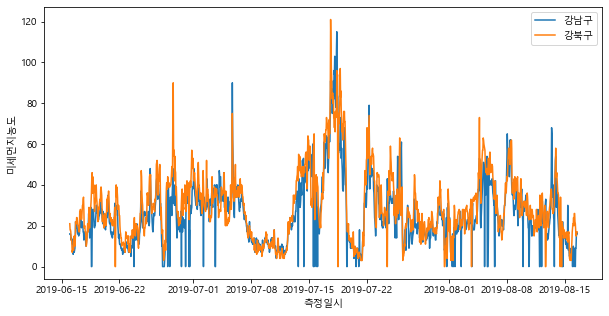

In [29]:
# 구별 Line Chart
plt.figure(figsize=(10, 5))

plt.plot(df_dust.index, df_dust['강남구'], label='강남구')
plt.plot(df_dust.index, df_dust['강북구'], label='강북구')

plt.legend()
plt.xlabel('측정일시')
plt.ylabel('미세먼지농도')

plt.show()

In [16]:
df_microdust_mean = df.groupby(by='측정소명')['초미세먼지(㎍/㎥)'].mean()
df_microdust_mean

측정소명
강남구     16.358835
강동구     17.595802
강북구     17.312119
강서구     19.687881
관악구     15.069059
광진구     20.027082
구로구     16.608666
금천구     16.837508
노원구     18.303995
도봉구     13.423832
동대문구    17.072444
동작구     19.648612
마포구     18.700068
서대문구    15.467163
서초구     18.930941
성동구     17.653351
성북구     14.454299
송파구     15.044685
양천구     19.220041
영등포구    20.318890
용산구     18.203791
은평구     17.780636
종로구     14.761679
중구      16.909953
중랑구     16.112390
Name: 초미세먼지(㎍/㎥), dtype: float64

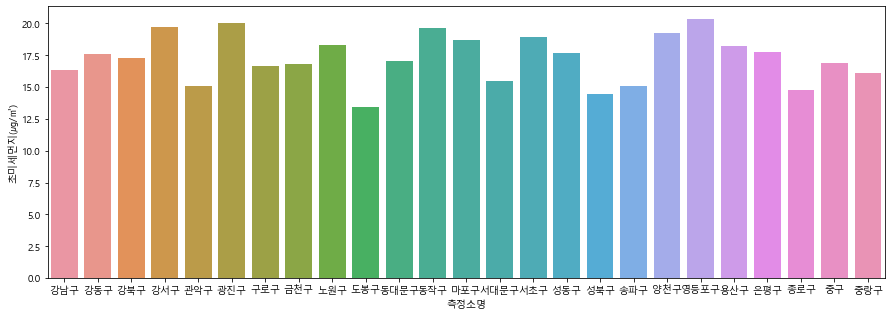

In [32]:
plt.figure(figsize=(15, 5))

sns.barplot(x=df_microdust_mean.index, y=df_microdust_mean)

plt.show()

In [30]:
df_co_mean = df.groupby(by='측정소명')['일산화탄소농도(ppm)'].mean()
df_co_mean

측정소명
강남구     0.334936
강동구     0.355450
강북구     0.336087
강서구     0.350575
관악구     0.234733
광진구     0.623223
구로구     0.265064
금천구     0.353758
노원구     0.360799
도봉구     0.401760
동대문구    0.324171
동작구     0.329316
마포구     0.514895
서대문구    0.598510
서초구     0.308192
성동구     0.358768
성북구     0.615843
송파구     0.300406
양천구     0.361611
영등포구    0.342654
용산구     0.356737
은평구     0.274611
종로구     0.414218
중구      0.322749
중랑구     0.316791
Name: 일산화탄소농도(ppm), dtype: float64

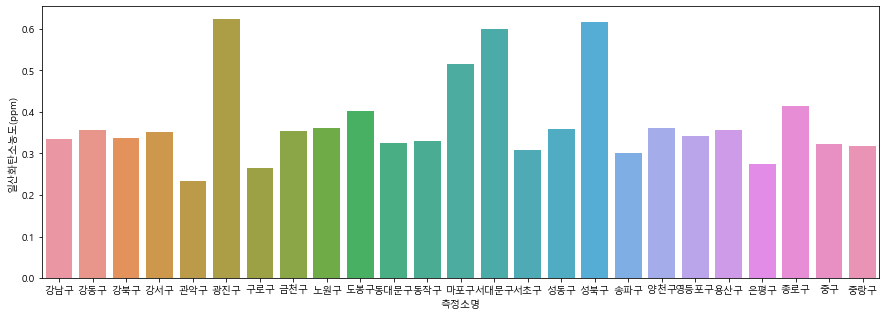

In [31]:
plt.figure(figsize=(15, 5))

sns.barplot(x=df_co_mean.index, y=df_co_mean)

plt.show()

In [20]:
pd.melt(df_dust[['강남구','강서구']])

,측정소명,value
0,강남구,16
1,강남구,16
2,강남구,16
3,강남구,15
4,강남구,13
...,...,...
2949,강서구,9
2950,강서구,11
2951,강서구,13
2952,강서구,21


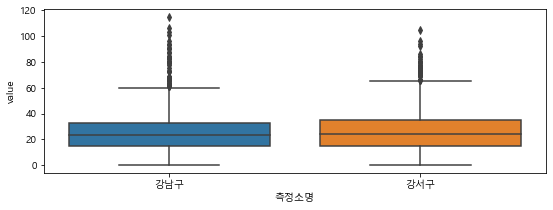

In [34]:
plt.figure(figsize=(9, 3))
df_box = df_dust[['강남구','강서구']]
sns.boxplot(data = pd.melt(df_box), x='측정소명', y='value')
plt.show()

In [22]:
df_dust

측정소명,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
측정일시,,,,,,,,,,,,,,,,,,,,,
2019-06-16 00:00:00,16,19,21,18,25,20,22,22,18,17,...,19,0,27,21,26,11,18,16,15,12
2019-06-16 01:00:00,16,20,18,17,25,17,16,25,18,15,...,14,22,24,22,25,11,19,14,13,14
2019-06-16 02:00:00,16,19,18,16,20,0,0,25,17,20,...,18,0,23,21,22,11,16,14,14,11
2019-06-16 03:00:00,15,17,17,17,20,0,15,24,14,16,...,16,18,23,18,23,8,15,17,13,8
2019-06-16 04:00:00,13,16,13,12,21,15,15,16,11,17,...,16,12,0,16,17,9,14,11,10,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-16 08:00:00,9,7,18,9,8,0,8,10,15,16,...,9,16,8,12,12,6,17,9,7,6
2019-08-16 09:00:00,9,3,15,11,13,0,7,9,16,7,...,19,21,10,15,13,10,12,9,9,8
2019-08-16 10:00:00,15,12,15,13,13,10,11,10,14,12,...,11,12,12,13,13,12,16,11,12,4


In [23]:
pd.melt(df_dust)

,측정소명,value
0,강남구,16
1,강남구,16
2,강남구,16
3,강남구,15
4,강남구,13
...,...,...
36920,중랑구,6
36921,중랑구,8
36922,중랑구,4
36923,중랑구,13


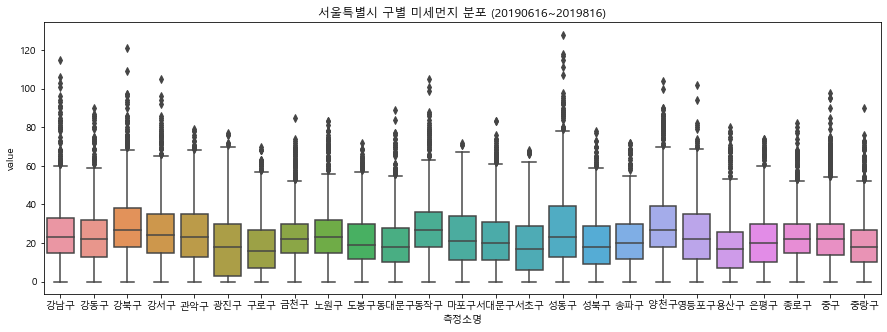

In [24]:
plt.figure(figsize=(15, 5))
plt.title('서울특별시 구별 미세먼지 분포 (20190616~2019816)')
sns.boxplot(data = pd.melt(df_dust), x='측정소명', y='value')
plt.show()